**Problem 1**

Text(0.5,1,'Second order centered, SSPRK3, CFL = 0.1')

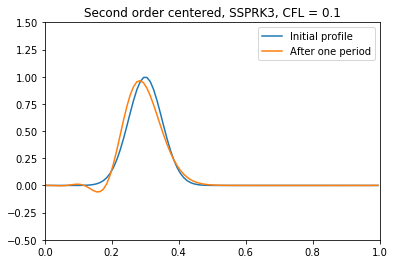

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.ion()

#The essential parameters for the problem
N_cells = 100  #the number of cells. 
N = N_cells+1  #N+1 is the number of cell edges.
CFL = 0.1  #CFL number
dx = 1.0/N_cells  #grid spacing
sig = 0.05  #sigma for the gaussian in the initial function
v = 1.0
CFL = 0.1
dt = CFL*dx/v
T = 1/v #Length of domain in code units is 1.0

x = np.arange(0,1+dx,dx)  #The cell edges
f_avg_arr = np.zeros(N_cells)  #stores N-1 initial cell averaged values
f_avg_final = np.zeros(N_cells) #stores N-1 final cell averaged values

#function to define the initial closed form profile (non-averaged)
def f_init(x):
    return np.exp((-(x-0.3)**2)/(2*(sig**2)))

#function to calculate the cell averaged values before beginning time iterations
def f_init_avg(x):
    for i in range(N-1):  #this is the number of cells
        f_avg = integrate.quad(f_init,x[i],x[i+1])   #averaging the function between cell edges
        f_avg_arr[i] = f_avg[0]/dx  #the values are for the cells centered at (x[i]+x[i+1])/2
 
    return f_avg_arr
        
#function to evaluate the second order centered flux 
def second_centered(phi):
    phi_jp1 = phi[np.arange(1,N_cells+1,1)%N_cells]	#making necessary adjustments to 
    phi_jm1 = phi[np.arange(-1,N_cells-1,1)%N_cells]	#enforce the periodic B.C
    
    flux = -v*(phi_jp1 - phi_jm1)/(2*dx)
    return flux

#time stepping
def ssprk3(phi):
    t = 0
    while(t<=T):
        phi_np1 = np.zeros(len(phi))
        phi1 = np.zeros(len(phi))
        phi2 = np.zeros(len(phi))
        
        phi1 = phi + dt*second_centered(phi)

        phi2 = 0.75*phi + 0.25*(phi1 + dt*second_centered(phi1))
        
        phi_np1 = (1.0/3.0)*phi + (2.0/3.0)*(phi2 + dt*second_centered(phi2))
        phi = phi_np1  ##reassigning phi with the phi at next time step
        
        t += dt
        
    return phi
    
#calculating the cell averages
f_avg_arr = f_init_avg(x)

#obtaining the final time step result
f_avg_final = ssprk3(f_avg_arr)

#plotting and comparing the initial and final results after one full period
plt.plot(x[1:]-0.5*dx,f_avg_arr,label='Initial profile')  #plotting the initial profile
plt.plot(x[1:]-0.5*dx,f_avg_final,label='After one period')  #plotting the final profile
plt.ylim([-0.5,1.5])
plt.xlim([0,1])
plt.legend()
plt.title('Second order centered, SSPRK3, CFL = 0.1')